In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Import user defined functions.
import parse as prs

# Read and parse json.
df = pd.read_json('data/train.json')

# Defining names of the target
target_names = ['high','medium','low']

In [2]:
# A quick look at the dataframe.
rows = np.random.choice(df.index.values, 5)
sampled_df = df.ix[rows]
sampled_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
79828,1.0,1,a175cb5fe31395bede6ab3332161ccf5,2016-05-04 02:43:22,PREWAR BUILDING LOCATED IN THE MOST DESIRABLE ...,W 73 St.,"[Elevator, Laundry in Building, Dishwasher, Ha...",low,40.7778,6962732,-73.9781,d0bb1f50091eb583b77641d698cb9ba9,[https://photos.renthop.com/2/6962732_b3d9e800...,3200,48 W 73 St.
99647,3.0,4,0,2016-04-26 05:55:58,THIS SUPER LUXURIOUS BUILDING OFFER THE ULTIMA...,North End Avenue,"[Roof Deck, Dining Room, Doorman, Elevator, La...",low,40.7160,6927665,-74.0148,cbcd513212d592e6c717d27be14f46ac,[https://photos.renthop.com/2/6927665_aa6f1ffd...,13700,200 North End Avenue
39914,1.0,0,89d3f31d96385eed1a427f57a780e779,2016-06-21 02:11:35,Located in the highly coveted Lincoln Center a...,"W 68th St,","[Elevator, Stainless Steel Appliances, High Ce...",low,40.7756,7187714,-73.9829,bd0463ff134d5c2124386fd86f520ac0,[https://photos.renthop.com/2/7187714_0326e679...,2225,"148 W 68th St,"
108222,2.0,2,9e67c52439dd77fd22822821ed6f062d,2016-04-08 02:55:24,"Lease break through 9/1/2016, can extend if de...",Luquer Street,"[Dining Room, Balcony, Doorman, Elevator, Gard...",low,40.6776,6842672,-74.0014,4a3c4e817bb3aba23a5ac50444df82ed,[https://photos.renthop.com/2/6842672_5c56ebd6...,4500,100 Luquer Street
86462,1.0,1,9377f4ea7d5cfba9098234521f2d72cb,2016-04-06 04:26:29,,Mulberry Street,"[Cats Allowed, Dogs Allowed]",low,40.7199,6830599,-73.9968,8f5a9c893f6d602f4953fcc0b8e6e9b4,[https://photos.renthop.com/2/6830599_2db19c10...,2895,172 Mulberry Street


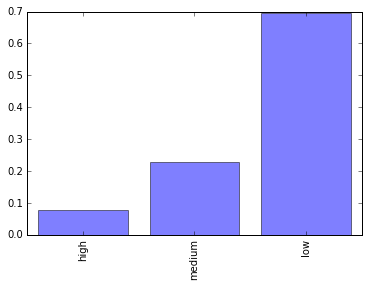

In [3]:
# Proportion of interest level.
prop_interest = []
for interest_name in target_names:
   prop_interest.append(np.float(np.sum(df.interest_level==interest_name))/np.float(np.shape(df)[0]))

# Plotting as graph bar.
y_pos = np.arange(len(target_names))
plt.bar(y_pos, prop_interest, align='center', alpha=0.5)
plt.xticks(y_pos, target_names, rotation='vertical') 
plt.show()

In [4]:
X, y = prs.parse_1(df.copy()),prs.target(df)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [39]:
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_train, y_train)

In [40]:
y_val_pred = clf.predict_proba(X_val)
val_loss = log_loss(y_val,y_val_pred)
print(val_loss)
y_train_pred = clf.predict_proba(X_train)
train_loss = log_loss(y_train,y_train_pred)
print(train_loss)

0.627003063457
0.155624832734


In [41]:
# Predicting data.
df_test = pd.read_json('data/test.json')
X_test = prs.parse_1(df_test.copy())
y_test_pred = clf.predict_proba(X_test)
ids = df_test['listing_id'].values


In [43]:
# Writting the submission file
labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx
subm = pd.DataFrame()
subm["listing_id"] = df_test["listing_id"]
for label in ["high", "medium", "low"]:
    subm[label] = y_test_pred[:, labels2idx[label]]
subm.to_csv("submission.csv", index=False)

